In [1]:
import pandas as pd
import jaconv
from bs4 import BeautifulSoup 
from urllib import request
from urllib.error import HTTPError
import matplotlib.pyplot as plt
import numpy as np
import pickle
import datetime

# Change fontype of pyplot
import matplotlib.font_manager
#print([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams['font.family'] = 'MS Gothic'

In [2]:
# データLoad
df = pd.read_csv("./SuperD_Class5_keiki.csv")

# change to datetime format
df["date"] = pd.to_datetime(df["date"],format="%Y_%m_%d")

Text(0, 0.5, 'count')

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

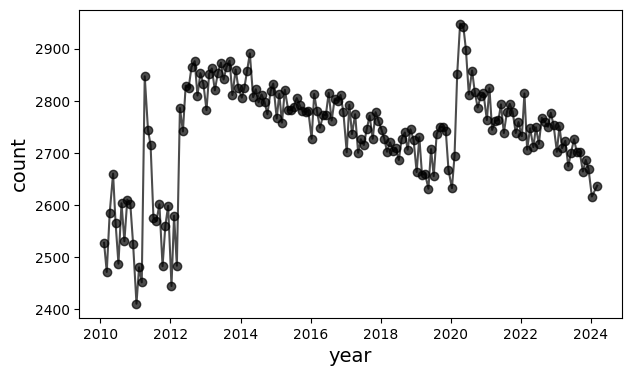

In [3]:
#回答数の時系列
# 
# 
# check
df_date = pd.DataFrame(df.groupby(["date"]).size())
df_date.reset_index(inplace=True)
df_date.columns = ["date","cnt"]

# plot
plt.figure(figsize=(7,4))
plt.plot(df_date["date"],df_date["cnt"],marker="o",color="k",alpha=0.7)
plt.xlabel("year",size=14)
plt.ylabel("count",size=14)
#plt.title("now")

Analyze cuurent

In [4]:
cond = df["type"] == "now"
df_now = df.loc[cond].copy()

cond = df["type"] == "future"
df_future = df.loc[cond].copy()

# aggregate by date
df_now_date = pd.DataFrame(df_now.groupby("date").mean("label"))

# aggregate by date
df_future_date = pd.DataFrame(df_future.groupby("date").mean("label"))

Text(0.5, 1.0, 'genjyou vs sakiyuki')

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

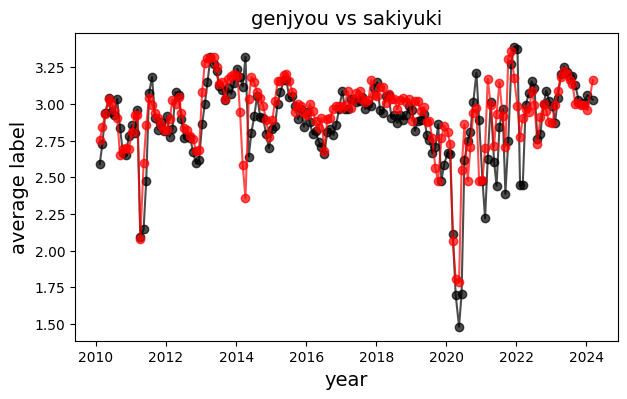

In [5]:
#黒：現状
#赤：先行き

plt.figure(figsize=(7,4))
plt.plot(df_now_date["label"],marker="o",color="k",alpha=0.7)
plt.xlabel("year",size=14)
plt.ylabel("average label",size=14)

plt.plot(df_future_date["label"],marker="o",color="r",alpha=0.7)
plt.title("genjyou vs sakiyuki",size=14)

GDPの成長率も追加する

In [6]:
import pandas_datareader.data as web
start = "1945/1/1"

In [7]:
# Daily data
df_gdp= web.DataReader("JPNRGDPEXP", 'fred',start)#Population, Total for World
#import py4macro
#df_gdp = pd.DataFrame(py4macro.data('jpn-q')["gdp"])
df_gdp.reset_index(inplace=True)
df_gdp.columns = ["date","gdp"]

df_gdp["date"] = pd.to_datetime(df_gdp["date"])
df_gdp["log_gdp"] = np.log(df_gdp["gdp"])
df_gdp["growth"] = df_gdp["log_gdp"].diff(1)
cond = df_gdp["date"] >= datetime.datetime.strptime("2010-01-01","%Y-%m-%d")
df_gdp = df_gdp.loc[cond].copy()


Text(0.5, 1.0, 'genjyou, sakiyuki, GDP')

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

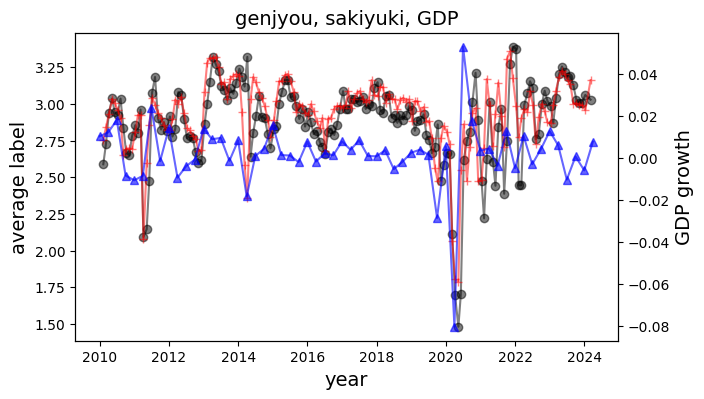

In [8]:
plt.figure(figsize=(7,4))
plt.plot(df_now_date["label"],marker="o",color="k",alpha=0.5)
plt.xlabel("year",size=14)
plt.ylabel("average label",size=14)
plt.plot(df_future_date["label"],marker="+",color="r",alpha=0.5)

plt.twinx()
plt.plot(df_gdp["date"],df_gdp["growth"],marker="^",color="b",alpha=0.6)
plt.ylabel("GDP growth",size=14)
plt.title("genjyou, sakiyuki, GDP",size=14)